### Fashion MNIST: Simple neural network

In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np

In [2]:
# Load fashion MNIST data set
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Print label and data for example training image
index = 0
np.set_printoptions(linewidth=320)
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

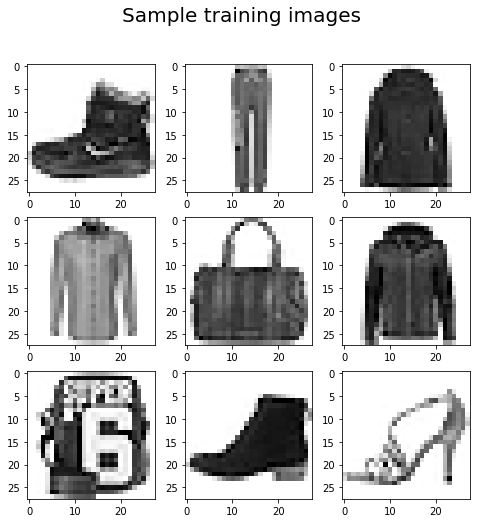

In [4]:
# Visualize example training images
plt.rcParams["figure.figsize"] = (8, 8)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3)
fig.suptitle('Sample training images', fontsize=20)

axes = ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9
for i, ax in zip(range(0, 9_000, 1_000), axes):
    ax.imshow(training_images[i], cmap='Greys')

In [5]:
# Note that pixel values range from 0 to 255
# Normalize range as 0 to 1

training_images = training_images / 255
test_images = test_images / 255

In [6]:
# Create model
# The flatten layer has an input shape of (28, 28) to match the image shape
# The final layer has 10 neurons to match the 10 classes of clothing in the data set
model = tf.keras.models.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                                    keras.layers.Dense(128, activation=tf.nn.relu),
                                    keras.layers.Dense(10, activation=tf.nn.softmax)])

In [7]:
# Compile model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Fit model
model.fit(training_images, training_labels, epochs=100, verbose=0);

In [9]:
# Evaluate
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 853us/step - loss: 0.7768 - accuracy: 0.8871


[0.77681565284729, 0.8870999813079834]